In [ ]:
# 2.2 Exercise
# Graph Analysis with Matplotlib
## Justin Wisniewski

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## The following dataset was pulled from Kaggle and provides
## comprehensive match data from the FIFA World Cup 2022

In [2]:
# Read in the FIFA dataset
df=pd.read_csv("FIFA.csv")

In [3]:
df.head

<bound method NDFrame.head of     match dayofweek           match_time      home_team     away_team  \
0       1       Sun  2022-11-20 19:00:00          Qatar       Ecuador   
1       2       Mon  2022-11-21 16:00:00        England       IR Iran   
2       3       Mon  2022-11-21 19:00:00        Senegal   Netherlands   
3       4       Mon  2022-11-21 22:00:00  United States         Wales   
4       5       Tue  2022-11-22 13:00:00      Argentina  Saudi Arabia   
..    ...       ...                  ...            ...           ...   
57     58       Fri  2022-12-09 22:00:00    Netherlands     Argentina   
58     59       Sat  2022-12-10 18:00:00        Morocco      Portugal   
59     60       Sat  2022-12-10 22:00:00        England        France   
60     61       Tue  2022-12-13 22:00:00      Argentina       Croatia   
61     62       Wed  2022-12-14 22:00:00         France       Morocco   

    home_xg  away_xg        score  attendance                          venue  \
0       0.3  

In [ ]:
# Questions I would like like to explore within the dataset are
## Which team has the highest attendance at home?
## Is there any team that stands out from attempted v completed passes?
## What stadium has sold the most tickets?

In [9]:
# Call groupby to group all of the rows based off unique values in home_team
df_groupby_home = df.groupby("home_team")
type(df_groupby_home)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
# Take a sum across each group
df_groupby_home_sums = df_groupby_home.sum()
df_groupby_home_sums

,match,home_xg,away_xg,attendance,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,away_attempted_pases,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
home_team,,,,,,,,,,,,,,,,,,,,,
Argentina,140,4.1,1.0,222010.0,187.0,113.0,1652.0,1956.0,883.0,1180.0,...,49.0,53.0,15.0,5.0,13.0,27.0,69.0,55.0,143.0,197.0
Australia,37,0.6,0.6,41232.0,32.0,68.0,215.0,348.0,580.0,723.0,...,33.0,19.0,1.0,3.0,9.0,4.0,32.0,27.0,82.0,106.0
Belgium,38,1.8,3.9,84170.0,120.0,80.0,1053.0,1247.0,679.0,836.0,...,34.0,28.0,3.0,4.0,28.0,20.0,34.0,36.0,121.0,122.0
Brazil,101,7.0,1.0,175599.0,166.0,134.0,1605.0,1871.0,1241.0,1519.0,...,35.0,59.0,4.0,6.0,14.0,28.0,63.0,46.0,132.0,174.0
Cameroon,77,2.7,4.4,125775.0,76.0,124.0,518.0,715.0,944.0,1150.0,...,54.0,30.0,0.0,5.0,25.0,10.0,35.0,35.0,137.0,100.0
Canada,41,1.4,0.5,43102.0,58.0,42.0,480.0,573.0,309.0,404.0,...,8.0,22.0,4.0,4.0,5.0,6.0,23.0,20.0,50.0,64.0
Costa Rica,44,1.3,5.7,67054.0,32.0,68.0,274.0,372.0,672.0,773.0,...,45.0,8.0,4.0,3.0,13.0,2.0,15.0,18.0,74.0,60.0
Croatia,126,3.9,5.9,132251.0,148.0,152.0,1546.0,1855.0,1618.0,1904.0,...,75.0,70.0,8.0,6.0,20.0,18.0,71.0,64.0,203.0,188.0
Denmark,6,1.4,0.9,42925.0,61.0,39.0,533.0,649.0,308.0,419.0,...,12.0,38.0,1.0,1.0,6.0,6.0,24.0,24.0,84.0,77.0


In [12]:
# Turn index back into a data column
df_groupby_home_sums = df_groupby_home_sums.reset_index()
df_groupby_home_sums

,home_team,match,home_xg,away_xg,attendance,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
0,Argentina,140,4.1,1.0,222010.0,187.0,113.0,1652.0,1956.0,883.0,...,49.0,53.0,15.0,5.0,13.0,27.0,69.0,55.0,143.0,197.0
1,Australia,37,0.6,0.6,41232.0,32.0,68.0,215.0,348.0,580.0,...,33.0,19.0,1.0,3.0,9.0,4.0,32.0,27.0,82.0,106.0
2,Belgium,38,1.8,3.9,84170.0,120.0,80.0,1053.0,1247.0,679.0,...,34.0,28.0,3.0,4.0,28.0,20.0,34.0,36.0,121.0,122.0
3,Brazil,101,7.0,1.0,175599.0,166.0,134.0,1605.0,1871.0,1241.0,...,35.0,59.0,4.0,6.0,14.0,28.0,63.0,46.0,132.0,174.0
4,Cameroon,77,2.7,4.4,125775.0,76.0,124.0,518.0,715.0,944.0,...,54.0,30.0,0.0,5.0,25.0,10.0,35.0,35.0,137.0,100.0
5,Canada,41,1.4,0.5,43102.0,58.0,42.0,480.0,573.0,309.0,...,8.0,22.0,4.0,4.0,5.0,6.0,23.0,20.0,50.0,64.0
6,Costa Rica,44,1.3,5.7,67054.0,32.0,68.0,274.0,372.0,672.0,...,45.0,8.0,4.0,3.0,13.0,2.0,15.0,18.0,74.0,60.0
7,Croatia,126,3.9,5.9,132251.0,148.0,152.0,1546.0,1855.0,1618.0,...,75.0,70.0,8.0,6.0,20.0,18.0,71.0,64.0,203.0,188.0
8,Denmark,6,1.4,0.9,42925.0,61.0,39.0,533.0,649.0,308.0,...,12.0,38.0,1.0,1.0,6.0,6.0,24.0,24.0,84.0,77.0
9,Ecuador,33,0.9,2.1,44569.0,61.0,39.0,365.0,482.0,203.0,...,19.0,29.0,0.0,3.0,9.0,6.0,23.0,17.0,77.0,71.0


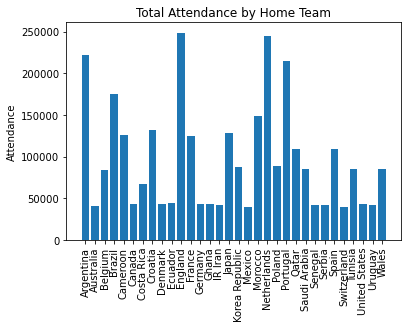

In [17]:
plt.bar(x="home_team", height='attendance', data=df_groupby_home_sums)
plt.ylabel("Attendance")
plt.title("Total Attendance by Home Team")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Create a correlation matrix
pear_corr=df.corr(method='pearson')
pear_corr

,match,home_xg,away_xg,attendance,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,away_attempted_pases,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
match,1.000000,-0.059075,0.298624,0.127888,-0.444556,0.444556,-0.291411,-0.287329,0.489067,0.490838,...,0.268126,-0.269467,-0.051427,0.099477,0.318148,-0.206121,-0.087137,0.078129,0.125046,-0.029215
home_xg,-0.059075,1.000000,-0.277228,-0.068721,0.365662,-0.365662,0.448400,0.427890,-0.251902,-0.274935,...,-0.443809,0.176071,0.024915,0.163580,-0.195415,0.153616,-0.024153,-0.295688,-0.112597,-0.216489
away_xg,0.298624,-0.277228,1.000000,0.015840,-0.336900,0.336900,-0.321706,-0.308160,0.295749,0.291040,...,0.457425,-0.167395,-0.112321,0.027782,0.479722,-0.358634,-0.122658,0.008488,0.328775,-0.142856
attendance,0.127888,-0.068721,0.015840,1.000000,0.042081,-0.042081,0.003493,-0.000806,-0.101741,-0.099426,...,-0.018851,-0.227221,0.193008,0.028998,0.087411,-0.000460,-0.075665,-0.210914,-0.170651,-0.262069
home_possession,-0.444556,0.365662,-0.336900,0.042081,1.000000,-1.000000,0.873872,0.886739,-0.884327,-0.896944,...,-0.728027,0.487318,0.170950,-0.024583,-0.375434,0.352181,0.163609,-0.489606,-0.064683,-0.114988
away_possession,0.444556,-0.365662,0.336900,-0.042081,-1.000000,1.000000,-0.873872,-0.886739,0.884327,0.896944,...,0.728027,-0.487318,-0.170950,0.024583,0.375434,-0.352181,-0.163609,0.489606,0.064683,0.114988
home_completed_passes,-0.291411,0.448400,-0.321706,0.003493,0.873872,-0.873872,1.000000,0.993514,-0.586660,-0.615566,...,-0.677360,0.312726,0.205196,0.004940,-0.398133,0.358090,0.037309,-0.477137,-0.189969,-0.233754
home_attempted_pases,-0.287329,0.427890,-0.308160,-0.000806,0.886739,-0.886739,0.993514,1.000000,-0.605446,-0.625633,...,-0.656545,0.367928,0.221955,0.001094,-0.393389,0.377436,0.113885,-0.447237,-0.116700,-0.181049
away_completed_passes,0.489067,-0.251902,0.295749,-0.101741,-0.884327,0.884327,-0.586660,-0.605446,1.000000,0.995295,...,0.616722,-0.442228,-0.049522,0.006738,0.258858,-0.270849,-0.194731,0.398716,-0.024182,0.006700
away_attempted_pases,0.490838,-0.274935,0.291040,-0.099426,-0.896944,0.896944,-0.615566,-0.625633,0.995295,1.000000,...,0.653144,-0.425680,-0.048094,0.006746,0.264441,-0.260723,-0.146302,0.447766,0.018945,0.061316


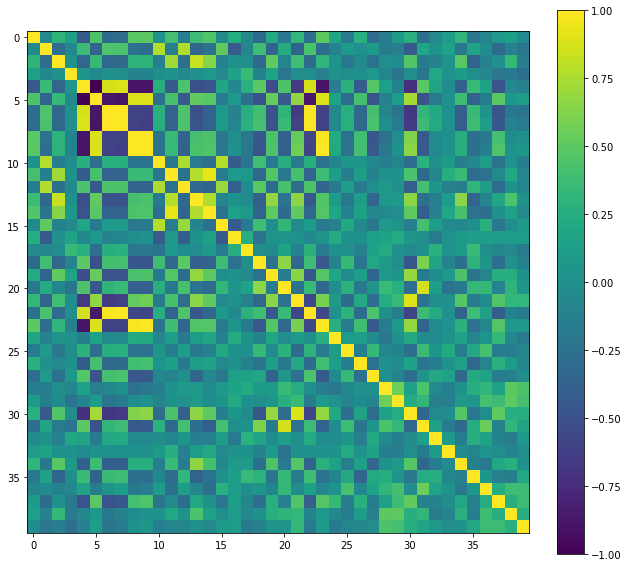

In [22]:
# Plot Matplotlib heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

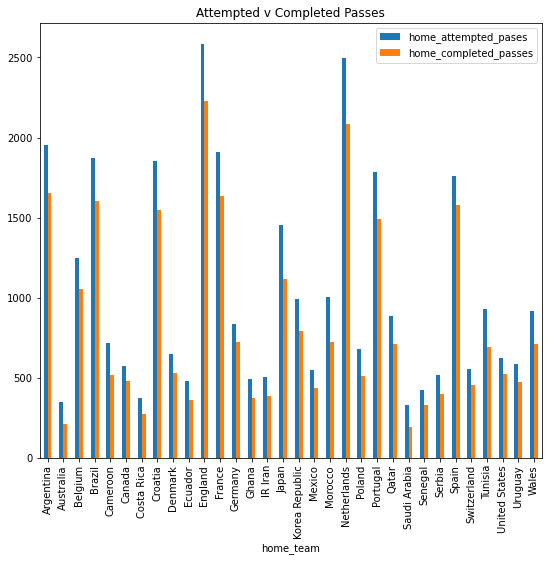

In [33]:
# Plot the dataframe
df_groupby_home_sums.plot(x="home_team", y=["home_attempted_pases", "home_completed_passes"], kind="bar", figsize=(9, 8))
plt.title("Attempted v Completed Passes")
# Print bar graph
plt.show()

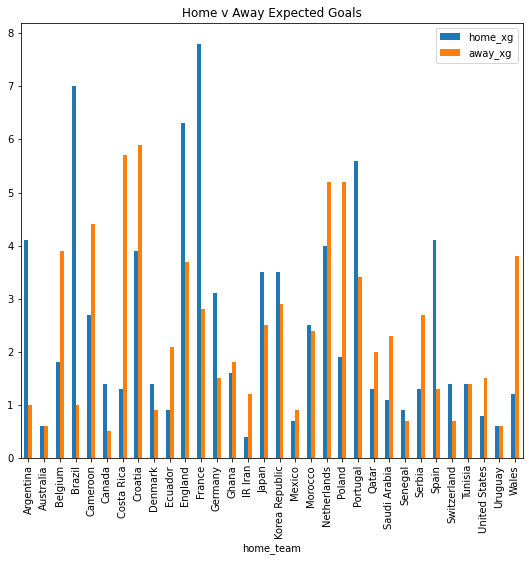

In [38]:
# Plot the dataframe
df_groupby_home_sums.plot(x="home_team", y=["home_xg", "away_xg"], kind="bar", figsize=(9, 8))
plt.xticks(rotation=90)
plt.title("Home v Away Expected Goals")
# Print bar graph
plt.show()

In [43]:
# Call groupby to group all of the rows based off unique values in venue
df_groupby_venue = df.groupby("venue")
type(df_groupby_venue)

pandas.core.groupby.generic.DataFrameGroupBy

In [44]:
# Take a sum across each group
df_groupby_venue_sums = df_groupby_venue.sum()
df_groupby_venue_sums

,match,home_xg,away_xg,attendance,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,away_attempted_pases,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
venue,,,,,,,,,,,,,,,,,,,,,
Ahmed bin Ali Stadium,185,6.0,11.4,299517.0,375.0,325.0,3355.0,4054.0,2794.0,3495.0,...,145.0,117.0,11.0,7.0,52.0,57.0,156.0,140.0,464.0,533.0
Al Bayt Stadium,310,8.4,11.1,532855.0,415.0,385.0,3747.0,4456.0,3352.0,4092.0,...,152.0,95.0,16.0,15.0,62.0,41.0,145.0,131.0,472.0,508.0
Al Janoub Stadium,206,11.9,7.5,288774.0,338.0,362.0,2838.0,3709.0,3129.0,3963.0,...,152.0,169.0,11.0,11.0,52.0,49.0,190.0,154.0,534.0,520.0
Al Thumama Stadium,245,11.0,7.3,337685.0,428.0,372.0,3830.0,4588.0,3044.0,3798.0,...,129.0,145.0,23.0,22.0,62.0,66.0,143.0,153.0,503.0,498.0
Education City Stadium,268,8.9,10.4,349114.0,365.0,435.0,3201.0,4024.0,4123.0,4944.0,...,196.0,181.0,15.0,16.0,70.0,65.0,176.0,189.0,618.0,555.0
Khalifa International Stadium,183,11.9,9.6,311415.0,375.0,325.0,3173.0,3883.0,2854.0,3583.0,...,125.0,152.0,10.0,21.0,44.0,40.0,154.0,143.0,459.0,449.0
Lusail Iconic Stadium,339,10.7,9.8,696675.0,419.0,381.0,3482.0,4338.0,2990.0,3847.0,...,150.0,135.0,22.0,17.0,66.0,69.0,172.0,149.0,511.0,464.0
Stadium 974,217,11.3,9.4,297854.0,359.0,341.0,3199.0,3849.0,3135.0,3790.0,...,106.0,128.0,8.0,9.0,45.0,55.0,130.0,127.0,427.0,418.0


Text(0.5, 1.0, 'Ticket Sales')

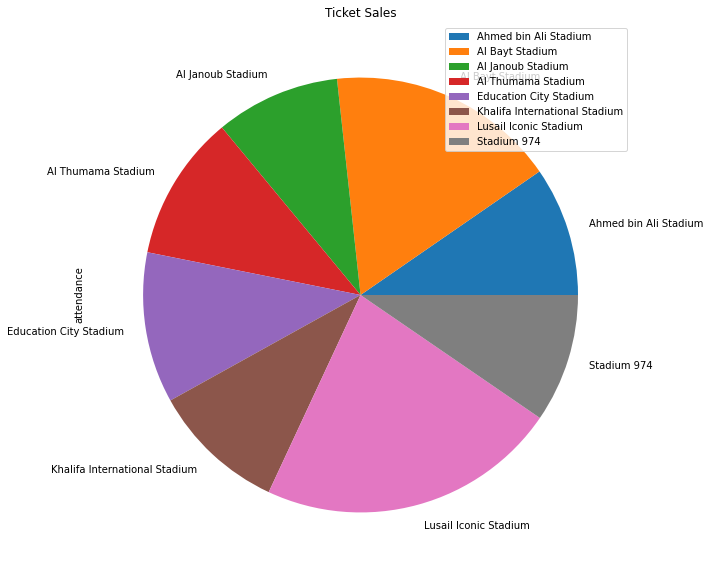

In [51]:
# Create pie chart showing attendance by venue
plot = df_groupby_venue_sums.plot.pie(y='attendance', figsize=(10, 10))
plt.title("Ticket Sales")

In [ ]:
# The first graph shows Argentina, England, Netherlands, and Portugal have had the highest attendance overall.
# The second graph shows England and Netherlands attempting and completing the highest number of passes.
# The third graph shows the Lusail Iconic Stadium with the most ticket sales

In [ ]:
# In conclusion, these graphs can tell a lot about how the teams have been performing throughout the World Cup.
# However, Croatia, Morocco, and France are all in the semi-finals and have not been brought to light
# Depending what questions are being asked, the visualizaiton being used would also then need to be determined.